##  Binary Classification 
    
 ###   Logistic Regression 
    

In [44]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(45)

In [140]:
# creating data set 

study_hours = np.append(np.random.normal(4, 1.2, 200),
                       np.random.normal(10, 1.6, 100))

# fail = 0, pass = 1
result = np.append(
    np.zeros(200),
    np.ones(100)
)

In [141]:
dataset = pd.DataFrame({
    "study hours":study_hours,
    "result": result
})

In [142]:
dataset.head(20)

,study hours,result
0,6.017687,0.0
1,3.905913,0.0
2,4.616139,0.0
3,4.161428,0.0
4,4.025851,0.0
5,5.972361,0.0
6,5.055524,0.0
7,3.367706,0.0
8,4.956577,0.0
9,2.419624,0.0


In [143]:
dataset.tail()

,study hours,result
295,9.043038,1.0
296,12.358009,1.0
297,10.017856,1.0
298,6.845670,1.0
299,7.424447,1.0


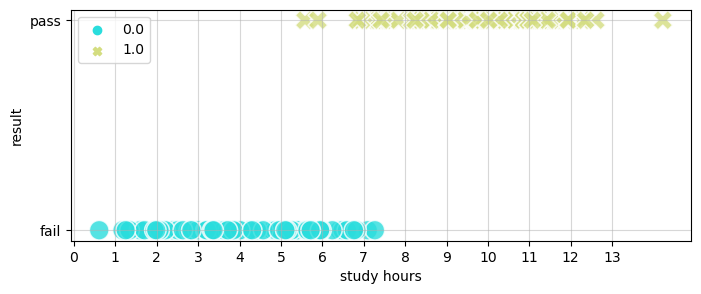

In [144]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data = dataset, 
               x = "study hours", 
               y = "result",
               hue = "result",
               style = "result", 
               s = 200, 
               alpha = 0.8,
               palette = "rainbow")
plt.grid(alpha = 0.5)
plt.yticks([0,1], ["fail", "pass"])
plt.xticks(np.arange(14))
plt.legend()
plt.show()

In [145]:
from sklearn.model_selection import train_test_split 

In [146]:
X = dataset[["study hours"]]
y = dataset["result"]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 45)

In [148]:
from sklearn.linear_model import LinearRegression 

In [149]:
model  = LinearRegression()

In [150]:
model.fit(X_train, y_train)

LinearRegression()

In [151]:
y_hat = model.predict(X_train)

In [152]:
print(min(y_hat), max(y_hat))

-0.30834351570827534 1.49623301914351


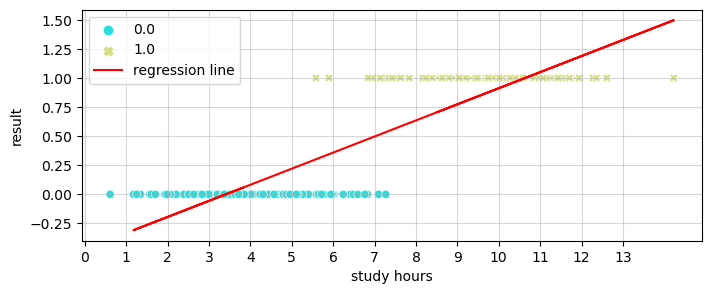

In [154]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data = dataset, 
               x = "study hours", 
               y = "result",
               hue = "result",
               style = "result", 
              
               palette = "rainbow")
plt.plot(X_train, y_hat, color = "red", label = "regression line")
plt.grid(alpha = 0.5)
plt.xticks(np.arange(14))
plt.legend()
plt.show()

In [155]:
def logit(t):
    return 1 / (1+np.exp(-t))

In [157]:
t = np.linspace(-10, 10, 200)
ft = logit(t)

$$ logit = \frac {1} {(1 + e^{-t})} $$

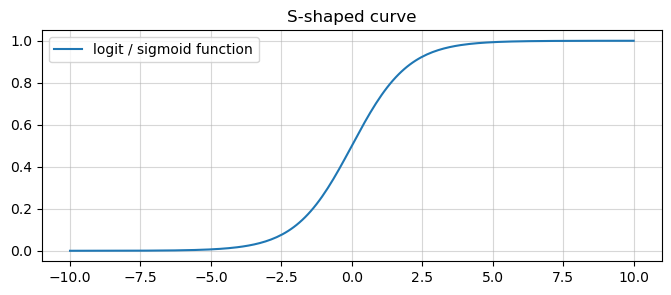

In [161]:
plt.figure(figsize=(8, 3))
plt.plot(t, ft, label = "logit / sigmoid function")
plt.xlabel = ("t")
plt.ylabel = ("logit(t)")
plt.grid(alpha = 0.5)
plt.title("S-shaped curve")
plt.legend()
plt.show()

$$\hat p = \frac {1} {(1 + e^{-t})}$$ 

$$ t = \theta_0 + \theta_1 X1  $$

$$\hat p = \frac {1} {1 + e^-(\theta_0 + \theta_1 X1 )}$$ 

if $ \hat  p >= 0.5 $ then $\hat y = 1 $ / pass

else $\hat p < 0.5 $ then $\hat y =  0 $ / fail

In [170]:
x = np.linspace(0.01, 1, 100)
log_p = np.log(x)

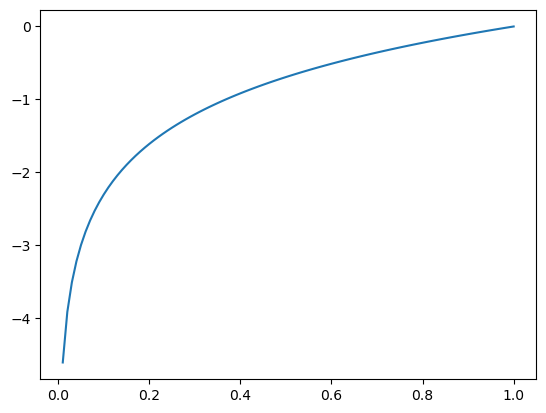

In [171]:
plt.plot(x, log_p)

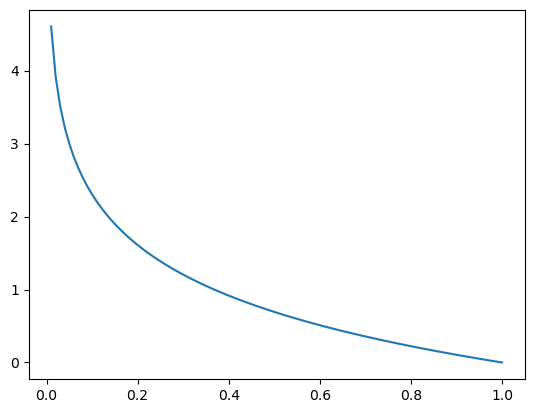

In [172]:
plt.plot(x, -log_p)

In [173]:
from sklearn.linear_model import LogisticRegression 

In [176]:
model  = LogisticRegression()

In [177]:
model.fit(X_train, y_train)

LogisticRegression()

In [178]:
y_hat = model.predict(X_train)

In [179]:
y_train[:5].to_numpy()

array([1., 1., 0., 0., 1.])

In [181]:
y_hat[:5]

array([1., 1., 0., 0., 1.])

In [182]:
y_proba = model.predict_proba(X_train)

In [186]:
y_proba.shape
# col 1 represent -> neg class
# col 1 represent -> positive value

(270, 2)

In [187]:
y_proba[:5]

array([[1.26407819e-02, 9.87359218e-01],
       [4.77885480e-06, 9.99995221e-01],
       [9.89100074e-01, 1.08999256e-02],
       [9.97311946e-01, 2.68805401e-03],
       [5.04492375e-04, 9.99495508e-01]])

In [188]:
p_fail = y_proba[:, 0]
p_pass = y_proba[:, 1]

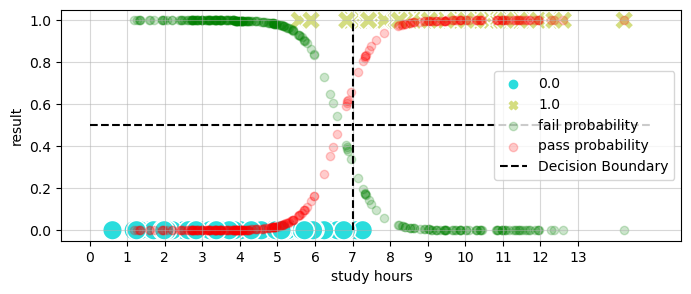

In [202]:
plt.figure(figsize = (8, 3))
sns.scatterplot(data = dataset, x = "study hours", y = "result", 
               hue = result, 
               style = result, 
               palette = "rainbow", s = 200)

plt.scatter(X_train, p_fail, color = "green", alpha = 0.2, label  = "fail probability")
plt.scatter(X_train, p_pass, color = "red", alpha = 0.2, label  = "pass probability")
plt.hlines(0.5, 0 , 15, ls = "--", color="k", label ="Decision Boundary")
plt.vlines(7, 0, 1, ls = "--", color = "k")
plt.grid(alpha = 0.5)
plt.legend()
plt.xticks(np.arange(14))
plt.show()